In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import numpy as np
import community as community_louvain
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import closeness_centrality
from networkx.algorithms import pagerank
# from networkx.algorithms.community.centrality import girvan_newman



In [28]:
df = pd.read_csv('/kaggle/input/netflix-movies/netflix_titles_nov_2019.csv').dropna().head(2500)



In [29]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie


In [30]:
df[['director', 'rating']]

,director,rating
2,Abhishek Sharma,TV-14
3,Mati Diop,TV-14
5,Moses Inwang,TV-14
6,Jérémy Clapin,TV-MA
7,Mandla Dube,TV-MA
...,...,...
4157,Raj Kanwar,TV-PG
4158,Pooja Bhatt,TV-14
4159,Satish Kaushik,TV-14
4160,Nikhil Advani,TV-PG


In [32]:
ls = []
for i, r in df.iterrows():
    d = r['director'].split(', ')
    for n in d:
        ls.append({'director': n, 'rating': r['rating']})
data = pd.DataFrame(ls).drop_duplicates()


In [33]:
data

,director,rating
0,Abhishek Sharma,TV-14
1,Mati Diop,TV-14
2,Moses Inwang,TV-14
3,Jérémy Clapin,TV-MA
4,Mandla Dube,TV-MA
...,...,...
2778,Brian Klein,TV-MA
2780,Nagesh Kukunoor,TV-14
2782,Raj Kanwar,TV-PG
2783,Pooja Bhatt,TV-14


In [34]:
directors = set(data['director'])
ratings = set(data['rating'])

In [35]:
print('Number of directors:', len(directors))
print('Number of ratings:', len(ratings))
print('Number of edges:', len(data))

Number of directors: 2217
Number of ratings: 13
Number of edges: 2452


<h1>Bipartite graph using the NetworkX library in Python</h1>

In [36]:
B = nx.Graph()

In [37]:
B.add_nodes_from(directors, bipartite = 1)
B.add_nodes_from(ratings, bipartite = 0)
for i, r in data.iterrows():
    B.add_edge(r['director'], r['rating'], weight = 1)

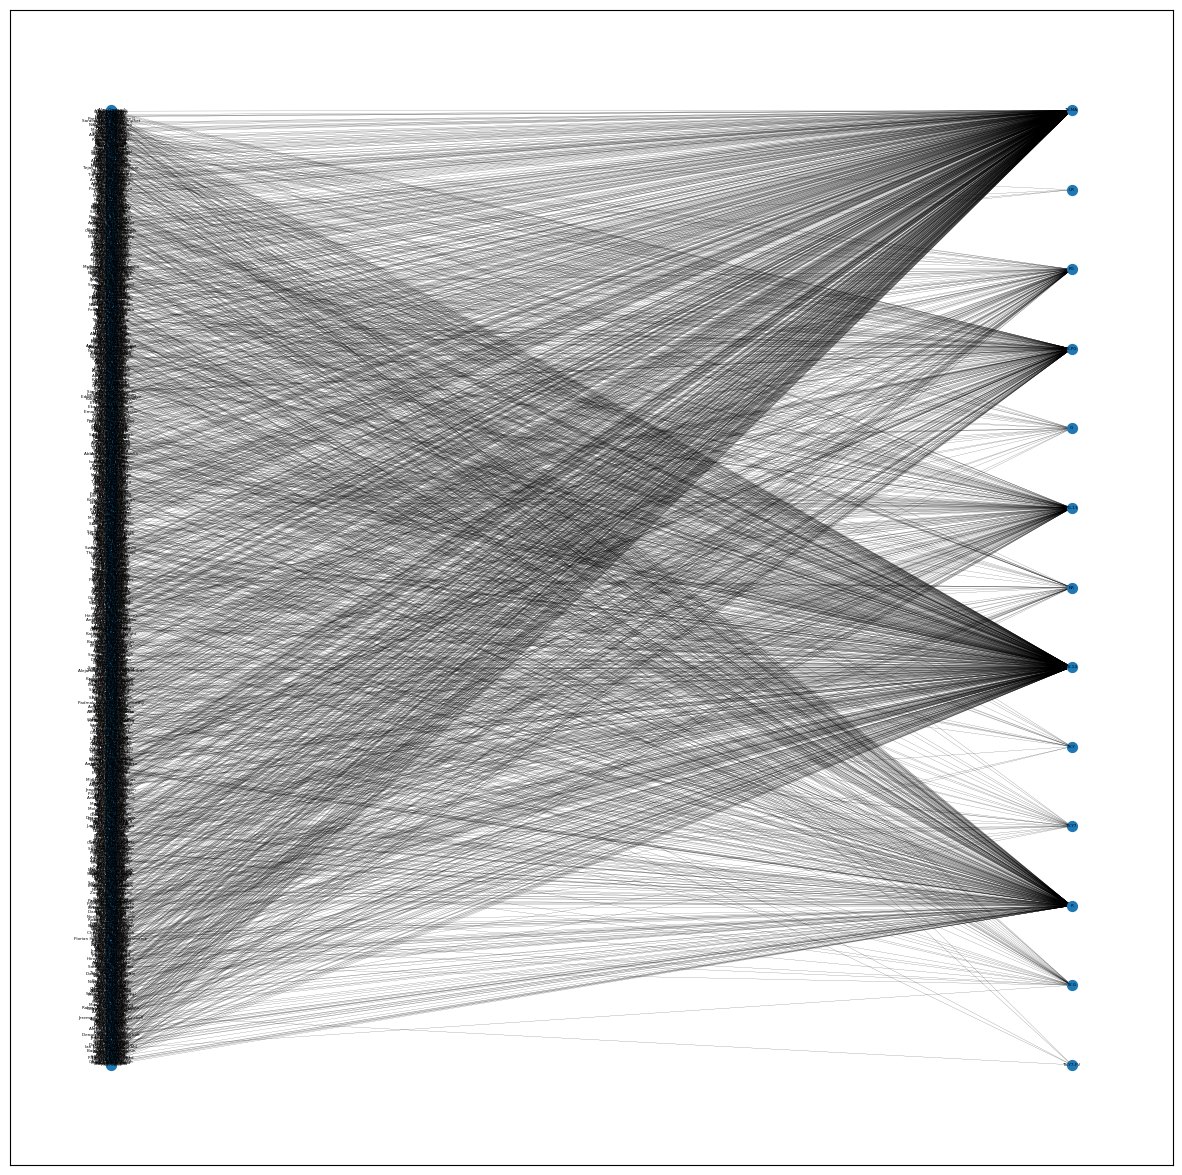

In [38]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(
    B, directors), font_size=3, width=0.1, with_labels=True, node_size=50)


<h1>Weighted projected graph from the bipartite graph</h1>

In [39]:
G = bipartite.weighted_projected_graph(B, directors)

In [24]:
# labels = nx.get_edge_attributes(G, 'weight')
# ll = []
# for key, value in labels.items():
#     ll.append({'source':key[0], 'targer':key[1], 'weight': value})
# pd.DataFrame(ll).to_csv('data/reprocessed/one_sited.csv', index=False)

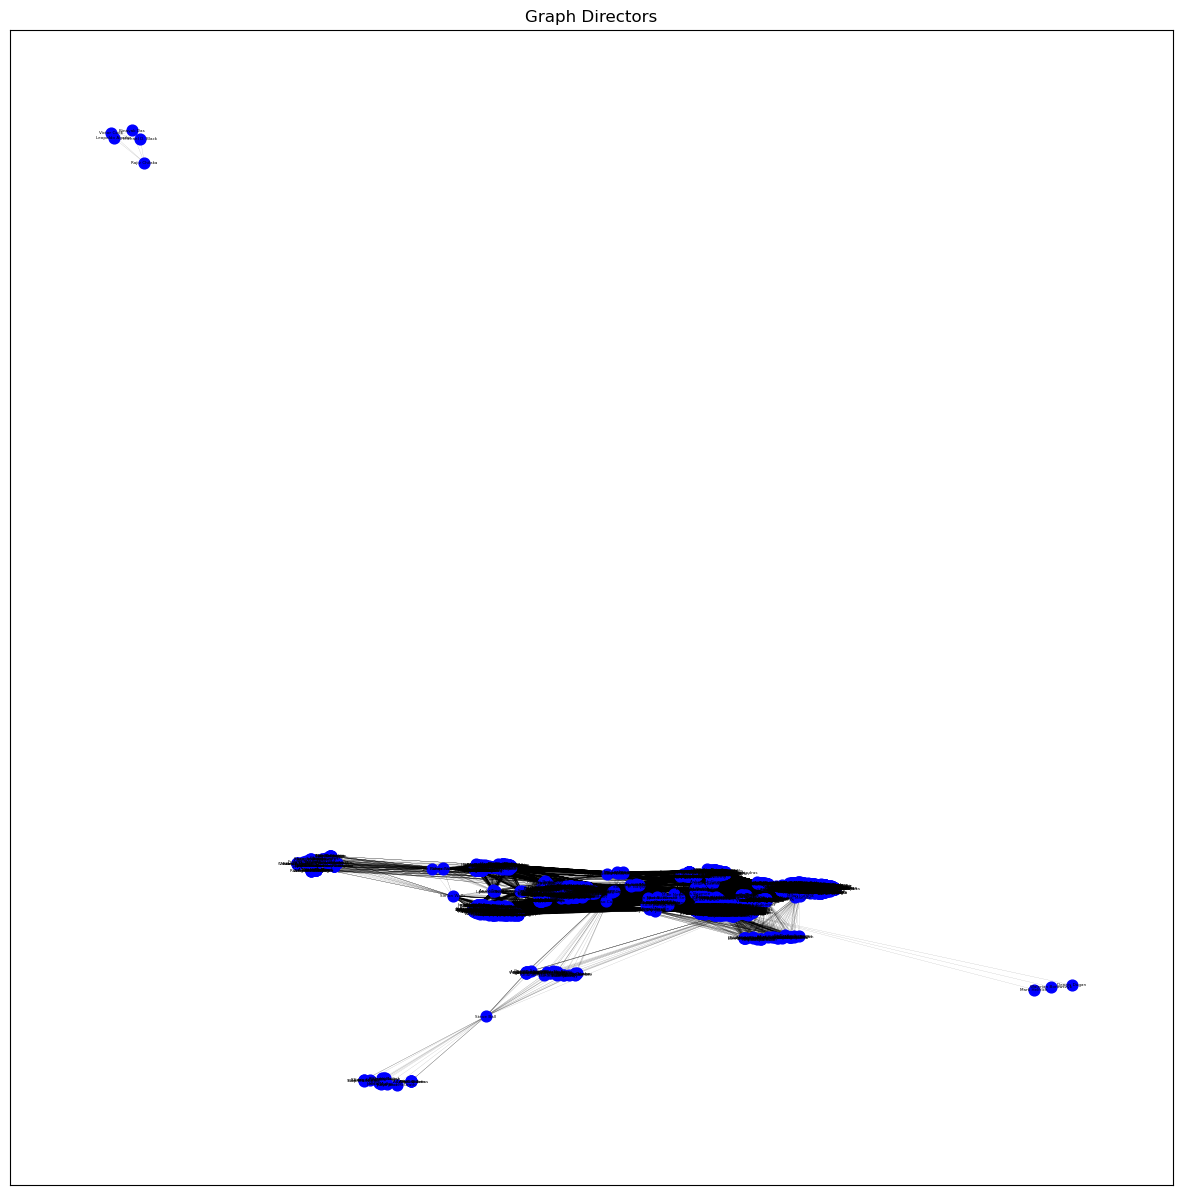

In [40]:
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=60, node_color='blue')
nx.draw_networkx_edges(G, pos=pos, width=0.05)
nx.draw_networkx_labels(G, pos=pos, font_size=3)
plt.title("Graph Directors")
plt.show()

<h1>Closeness Centrality</h1>

In [41]:
closeness_centrality = closeness_centrality(G)

In [ ]:
# plt.figure(figsize = (15,15))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*40) for v in closeness_centrality.values()], node_color=[ round(v*400) for v in closeness_centrality.values()])
# nx.draw_networkx_edges(G, pos=pos, width=0.05)
# plt.title("Graph Directors")
# plt.show()

In [42]:
top_closeness = sorted(closeness_centrality.items(),
                       key=lambda x: x[1], reverse=True)[0:19]
top_closeness_directors = [i[0] for i in top_closeness]
top_closeness


[('Chia-Liang Liu', 0.8007300477635019),
 ('Johnnie To', 0.7570388749445599),
 ('Onir', 0.7570388749445599),
 ('Rajkumar Hirani', 0.7570388749445599),
 ('Cathy Garcia-Molina', 0.7570388749445599),
 ('Umesh Mehra', 0.7570388749445599),
 ('Wong Jing', 0.7570388749445599),
 ('Leena Yadav', 0.7570388749445599),
 ('Priyadarshan', 0.7570388749445599),
 ('Yılmaz Erdoğan', 0.7570388749445599),
 ('Gajendra Ahire', 0.7570388749445599),
 ('Nagesh Kukunoor', 0.7228084146751139),
 ('Manny Rodriguez', 0.7195079196309353),
 ('Marcus Raboy', 0.7195079196309353),
 ('Sujoy Ghosh', 0.7129965357428726),
 ('Rakeysh Omprakash Mehra', 0.7129965357428726),
 ('Chris Stokes', 0.7129965357428726),
 ('Poj Arnon', 0.7129965357428726),
 ('Vlad Yudin', 0.7129965357428726)]

<h1>Betweenness Centrality</h1>

In [43]:
betweenness_centrality = betweenness_centrality(G)

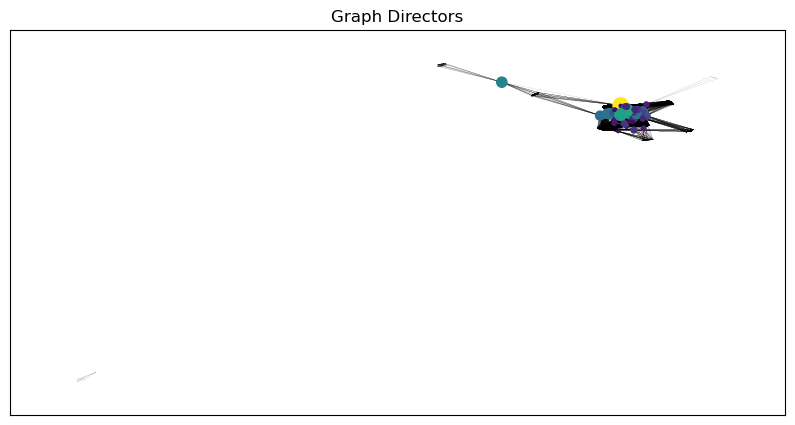

In [70]:
plt.figure(figsize = (10,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*4000) for v in betweenness_centrality.values()], node_color=[ round(v*4000) for v in betweenness_centrality.values()])
nx.draw_networkx_edges(G, pos=pos, width=0.05)
plt.title("Graph Directors")
plt.show()

In [45]:
top_betweenness = sorted(betweenness_centrality.items(),
                         key=lambda x: x[1], reverse=True)[0:19]
top_betweenness_directors = [i[0] for i in top_betweenness]
top_betweenness


[('Nagesh Kukunoor', 0.03033118251438207),
 ('Rajkumar Hirani', 0.01820619783566775),
 ('Chia-Liang Liu', 0.01803036333036693),
 ('Mike Newell', 0.01737350093765654),
 ('Martin Scorsese', 0.017180329758814394),
 ('Mae Czarina Cruz', 0.016594973788550366),
 ('Anees Bazmee', 0.014396300012060057),
 ('Troy Miller', 0.014118858491370513),
 ('Ashutosh Gowariker', 0.013731229752966553),
 ('Steve Ball', 0.013421779628558162),
 ('Riri Riza', 0.011991685929099634),
 ('Andrew Lau Wai-Keung', 0.011991685929099634),
 ('Ari Sandel', 0.011544946631821394),
 ('Leslie Small', 0.01150346906051699),
 ('Steven Soderbergh', 0.01142678580099637),
 ('John Asher', 0.010716475127006053),
 ('Jack C. Newell', 0.010716475127006053),
 ('Justin G. Dyck', 0.010509912593010911),
 ('Jon M. Chu', 0.010032314666798981)]

<h1>Pagerank</h1>

In [55]:
pagerank = nx.pagerank(G)

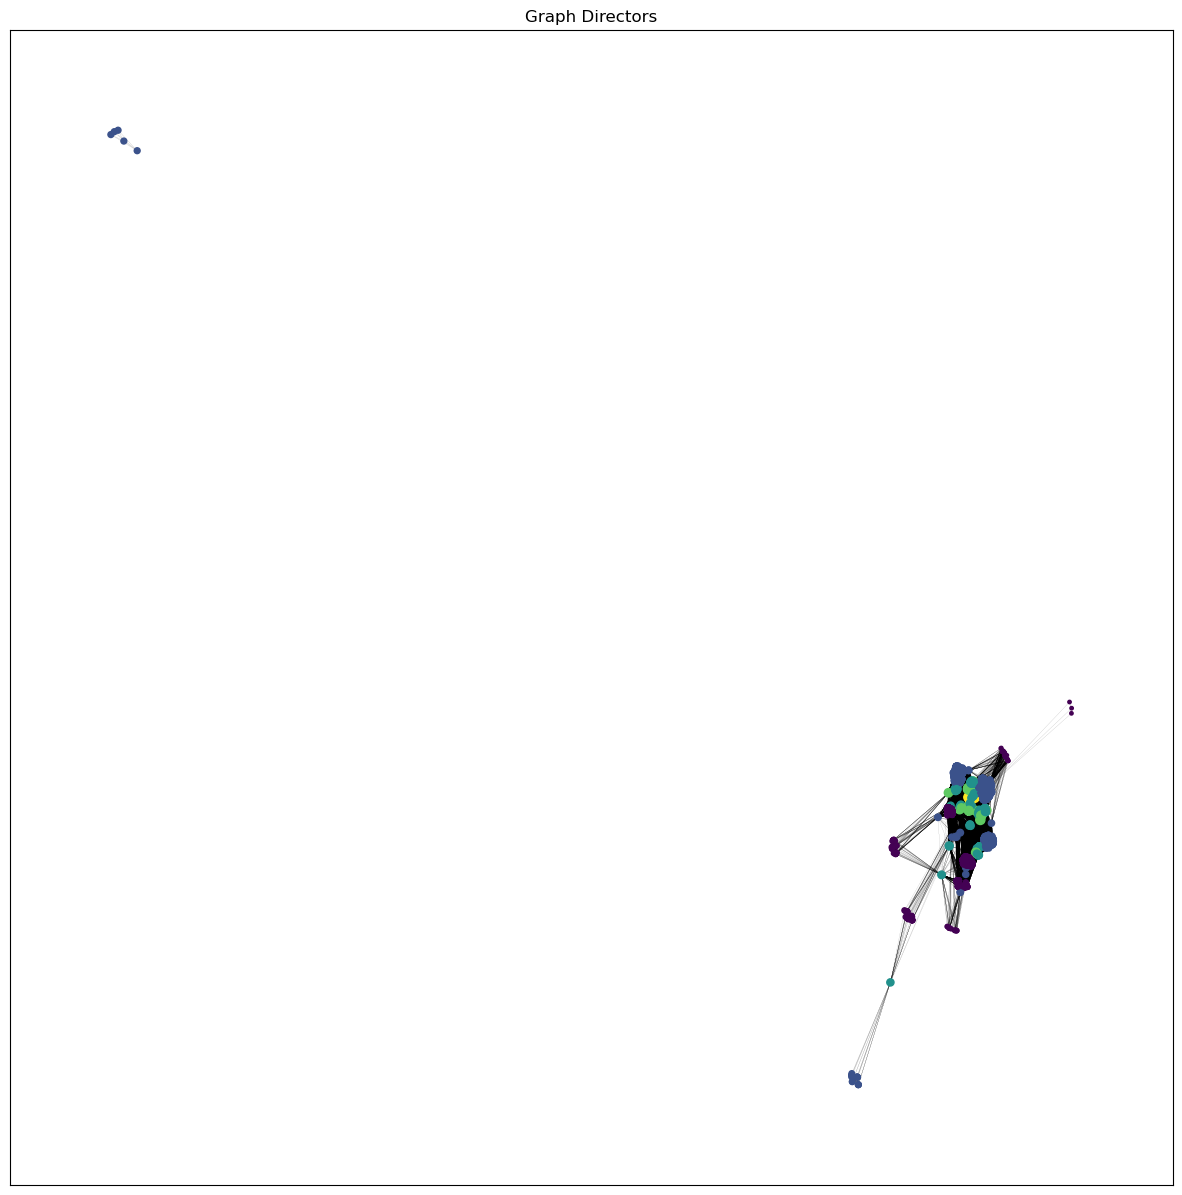

In [56]:
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*40000) for v in pagerank.values()], node_color=[ round(v*4000) for v in pagerank.values()])
nx.draw_networkx_edges(G, pos=pos, width=0.05)
plt.title("Graph Directors")
plt.show()

In [57]:
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1],
                      reverse=True)[0:19]
top_pagerank_directors = [i[0] for i in top_pagerank]
top_pagerank


[('Chia-Liang Liu', 0.0012963793293015381),
 ('Nagesh Kukunoor', 0.001156490046716297),
 ('Rajkumar Hirani', 0.0011334529812484727),
 ('Johnnie To', 0.001104655313004941),
 ('Onir', 0.001104655313004941),
 ('Cathy Garcia-Molina', 0.001104655313004941),
 ('Umesh Mehra', 0.001104655313004941),
 ('Wong Jing', 0.001104655313004941),
 ('Leena Yadav', 0.001104655313004941),
 ('Priyadarshan', 0.001104655313004941),
 ('Yılmaz Erdoğan', 0.001104655313004941),
 ('Gajendra Ahire', 0.001104655313004941),
 ('Steven Soderbergh', 0.0010926524917041027),
 ('Martin Scorsese', 0.0010877641044320656),
 ('Leslie Small', 0.001063883734683392),
 ('Mike Newell', 0.00105221082696841),
 ('Riri Riza', 0.0010234721302434923),
 ('Andrew Lau Wai-Keung', 0.0010234721302434923),
 ('Troy Miller', 0.0009947664314898129)]

<h2>Closeness Centrality - Betweenness Centrality - Pagerank</h2>

In [58]:
top_directors = set(top_pagerank_directors +
                    top_betweenness_directors + top_closeness_directors)
for i in top_directors:
    if i in top_closeness_directors and i in top_betweenness_directors and i in top_pagerank_directors:
        print(i)


Chia-Liang Liu
Rajkumar Hirani
Nagesh Kukunoor


<h1>Detecting communities in the projected graph using python-louvain package</h1>

In [59]:
import community
partition = community.best_partition(G)

In [60]:
values = list(partition.values())
print("Number of communities: ", len(np.unique(values)))

Number of communities:  8


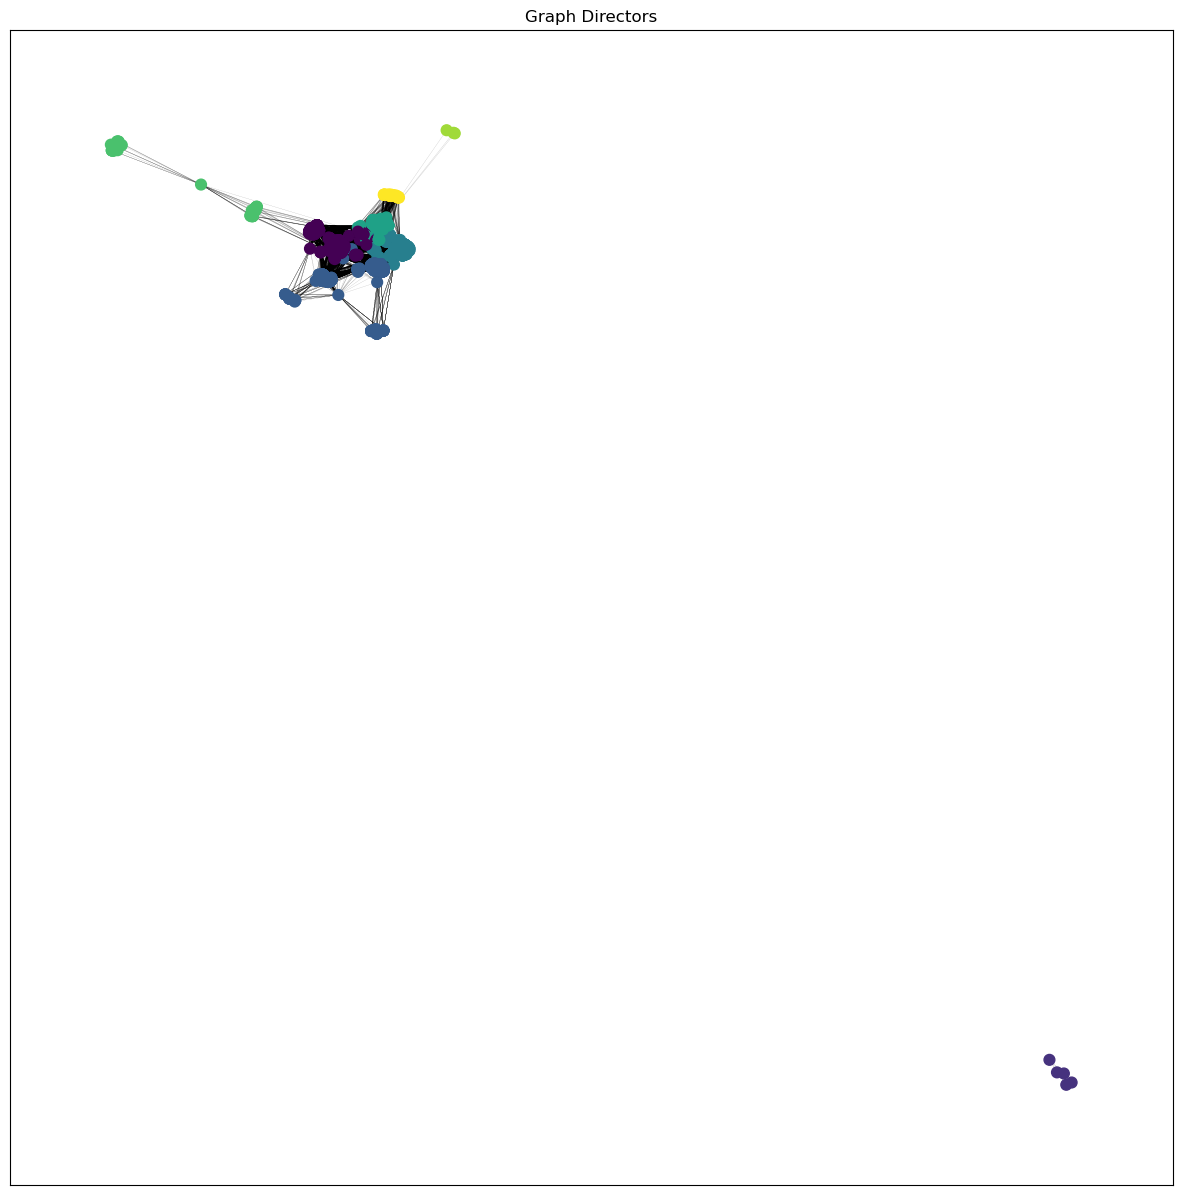

In [61]:
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=60, node_color=values)
nx.draw_networkx_edges(G, pos=pos, width=0.05)
plt.title("Graph Directors")
plt.show()

Text(0.5, 1.0, 'Community 1')

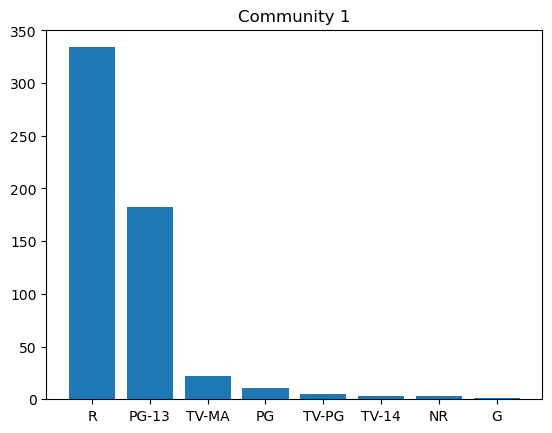

In [62]:
community_number = 0
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

R: means that the movie is restricted to audiences 17 years old and below.
PG-13: means that the movie may be inappropriate for children under 13 years old. 

Text(0.5, 1.0, 'Community 2')

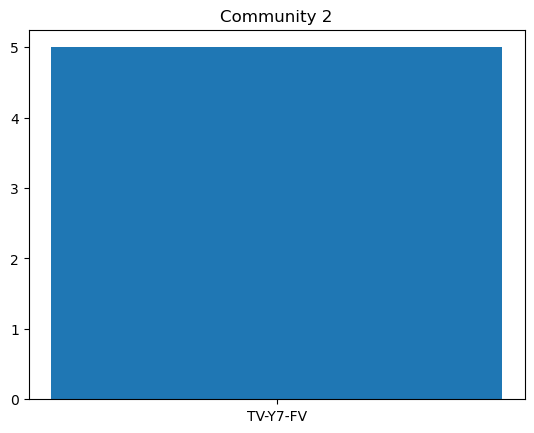

In [63]:
community_number = 1
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-Y7-FV: program is intended for children aged 7 years and above.

Text(0.5, 1.0, 'Community 3')

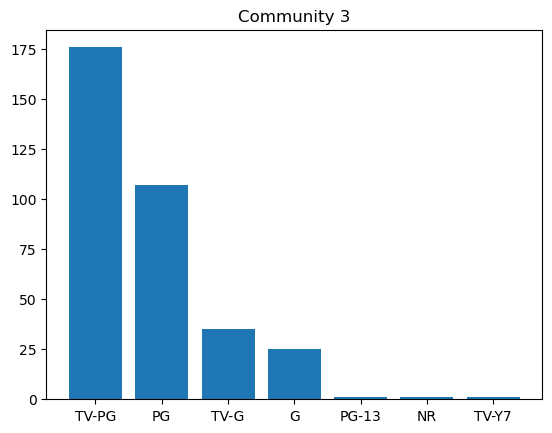

In [64]:
community_number = 2
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-PG: program or movie may contain material that requires parental guidance or may not be suitable for children.

Text(0.5, 1.0, 'Community 4')

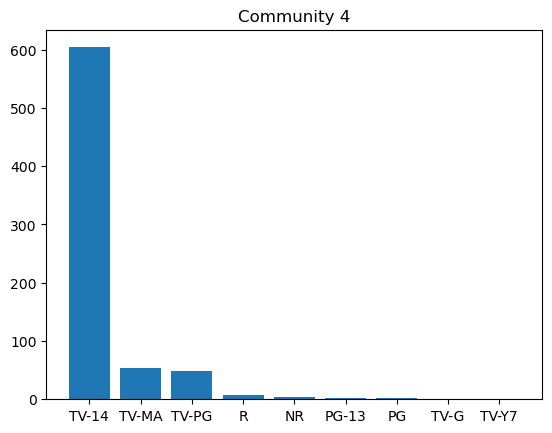

In [65]:
community_number = 3
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-14: program contains material that may not be suitable for children under 14 years of age.

Text(0.5, 1.0, 'Community 5')

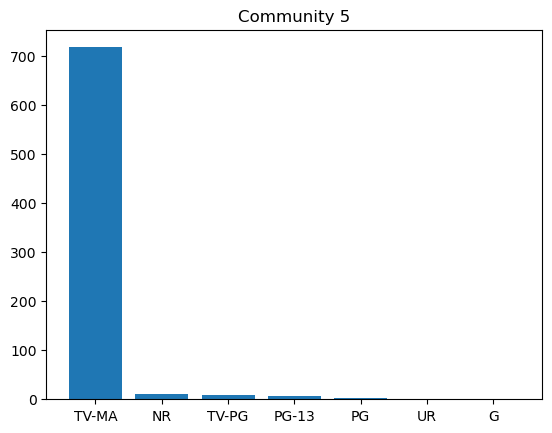

In [66]:
community_number = 4
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-MA: program is intended for mature audiences and may not be suitable for children under 17 years of age. 